In [ ]:
!pip install contractions
import pandas as pd
import os
import warnings
import re
import contractions
import nltk
warnings.filterwarnings("ignore", category=FutureWarning)
import re
from bs4 import BeautifulSoup
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 19.3 MB/s 
     |████████████████████████████████| 106 kB 64.7 MB/s 


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# amazon_reviews_data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/amazon_reviews_us_Jewelry_v1_00.tsv',sep='\t',on_bad_lines='skip')
# amazon_reviews_data.head()
path = "/content/gdrive/MyDrive/Colab Notebooks/data/data/"
#path = "/content/gdrive/MyDrive/group_17/data"
dir_list = os.listdir(path)
pd.set_option('display.max_colwidth', None)

In [ ]:
all_lines_list=list()
labels_list=list()
for filename in dir_list:
    file_extension_val=filename.split('.')
    file_extension=file_extension_val[1]
    if(file_extension=='txt'):
        label=filename.split('_')
        label=label[2]
        label=label.split('.')
        label=label[0]
        labels_list.append(label)
        # with open("/content/gdrive/MyDrive/Colab Notebooks/data/data/"+filename, encoding='unicode_escape') as file_ptr:
        with open(path + "/" + filename, encoding='utf-8') as file_ptr:
            lines_temp = list()
            for line in file_ptr:
                if(line.strip()!="-----------------------------"):
                    lines_temp.append(line)
            all_lines_list.append(lines_temp)

In [ ]:
df_posts=pd.DataFrame()
labels_global_list=list()
label_index=0
for lst in all_lines_list:
    df_temp = pd.DataFrame(lst)
    df_posts=df_posts.append(df_temp,ignore_index=True,)
#     label_length=len(lst)
    for i in range(len(lst)):
        labels_global_list.append(labels_list[label_index])
    label_index=label_index+1
    
df_labels = pd.DataFrame(labels_global_list)

In [ ]:
df_posts

,0
0,"Let our Experienced Techno-Functional Teams Support your existing #Applications while you focus on your New initiatives and #Innovations. Globally based #Offshore, Hybrid or Onsite. #applicationdevelopment #technicalsupport #apolis #nearshore #itmanangedservice #managedserviceprovider\n"
1,"Personally, I strongly support activists and I even admire their activities (send petitions to the government & Parliament, or peacefully protest outside Westminster). However, I do not support blocking roads to demand changes, as this action does not convince people. Instead, it makes people feel absurd and annoying, especially when someone is in emergency and they want to go to hospital for treatment immediately. In case they could not get treatment on time, their life will be at risk and protesters who blocks roads will have to take responsibility for their actions. #protests Just Stop Oil: What is it and what are its goals?\n"
2,"Let’s not be hoodwinked by Just StopOil’s ill-considered ‘Remembrance’ comment They stopped because they’ve alienated the very people they need to support them, and a grown up in the group has realised thatIt’s a perfect example of not thinking through the consequences of actions - a total lack of risk management or awareness Maybe they’ll think through their approaches in future and make them more targeted?What do people think would be an effective way for them to protest?#juststopoil #riskmanagement #protests Just Stop Oil: M25 protests to be halted\n"
3,What is the fallout from another morning of protests on the M25? Massive disruption across North West Kent - it's not just the motorway affected. This is the traffic through the usually sleepy Hamlet of Bean; just off the Bluewater junction from the A2. Do 'Just Stop Oil' have a justifiable right to cause this mayhem? Or are their methods alienating people that could help them influence MPs?#juststopoil #protests #traffic #m25 #northwestkent #kent\n
4,"Given the forthcoming general election in Nigeria, how much youth participation are you witnessing, especially with the lingering emotions from the EndSars protest.Do you think Nigerian youths are ready to make 2023 count? #nigeria #governance #protests\n"
...,...
16742,🤔 Le bilan de compétence est-il suffisant pour créer un nouveau projet professionnel?Quelques éléments de réponse dans ma video: L'aspect mental et émotionnel de l'individu est au cœur d'un changement de carrière réussi!Amandine#wellbeing #coaching #developpementpersonnel #transition #impactpositif #pnl #nlp #travail #healthymindset #carrière #reconversionprofessionnelle #bilandecompetences #entreprise #motivation #job\n
16743,Monday Motivation Healthy food for Energy boosting. * Bananas * Avocados * Eggs * Yogurt * Nuts * Berries * Apples * Oatmeal * BeansLearn about my Health Makeover Program and schedule a Free 20 minute consultation …https://lnkd.in/emtdmMQD.#eatcleanbevital #putyourselffirst #healthcoach #healthylifestyle #healthyfood #healthy #wellnesscoach #hardworkingwomen#nutritioncoach #lifestylechange #nutureyourself #holistichealth #healthymindset #healthyhabits #womensempowerment\n
16744,"It’s Day #28 of our 2nd Annual “Can We Laugh at Cancer?” Comedy Challenge. Rating Warning: Language and Concept. This is a very atypical joke for us. I was asked to write 4 more intense cancer-centric jokes (of 31 posts) for people who like more raw humor.My Story Behind The Joke: This is my most risque joke but it is true… My husband does not care.Next Steps: DM your email if you want to be notified of our upcoming ComedyCures research study and my Fall podcast launch.⁠⁠Please LIKE and SHARE this comedy post. Please also consider a donation to The ComedyCures Foundation to support our free, live and digital, award-winning therapeutic ComedyCures programming for patients, caregivers, and healthcare workers.⁠⁠Tell everyone to follow @comedycures and @sarannelive⁠⁠To learn more about my stage IV cancer story, ComedyCures programs or to donate: 

In [ ]:
complete_data = pd.concat([df_posts, df_labels], axis=1)
complete_data.columns = ['POSTS', 'LABEL']
complete_data

,POSTS,LABEL
0,"Let our Experienced Techno-Functional Teams Support your existing #Applications while you focus on your New initiatives and #Innovations. Globally based #Offshore, Hybrid or Onsite. #applicationdevelopment #technicalsupport #apolis #nearshore #itmanangedservice #managedserviceprovider\n",protests
1,"Personally, I strongly support activists and I even admire their activities (send petitions to the government & Parliament, or peacefully protest outside Westminster). However, I do not support blocking roads to demand changes, as this action does not convince people. Instead, it makes people feel absurd and annoying, especially when someone is in emergency and they want to go to hospital for treatment immediately. In case they could not get treatment on time, their life will be at risk and protesters who blocks roads will have to take responsibility for their actions. #protests Just Stop Oil: What is it and what are its goals?\n",protests
2,"Let’s not be hoodwinked by Just StopOil’s ill-considered ‘Remembrance’ comment They stopped because they’ve alienated the very people they need to support them, and a grown up in the group has realised thatIt’s a perfect example of not thinking through the consequences of actions - a total lack of risk management or awareness Maybe they’ll think through their approaches in future and make them more targeted?What do people think would be an effective way for them to protest?#juststopoil #riskmanagement #protests Just Stop Oil: M25 protests to be halted\n",protests
3,What is the fallout from another morning of protests on the M25? Massive disruption across North West Kent - it's not just the motorway affected. This is the traffic through the usually sleepy Hamlet of Bean; just off the Bluewater junction from the A2. Do 'Just Stop Oil' have a justifiable right to cause this mayhem? Or are their methods alienating people that could help them influence MPs?#juststopoil #protests #traffic #m25 #northwestkent #kent\n,protests
4,"Given the forthcoming general election in Nigeria, how much youth participation are you witnessing, especially with the lingering emotions from the EndSars protest.Do you think Nigerian youths are ready to make 2023 count? #nigeria #governance #protests\n",protests
...,...,...
16742,🤔 Le bilan de compétence est-il suffisant pour créer un nouveau projet professionnel?Quelques éléments de réponse dans ma video: L'aspect mental et émotionnel de l'individu est au cœur d'un changement de carrière réussi!Amandine#wellbeing #coaching #developpementpersonnel #transition #impactpositif #pnl #nlp #travail #healthymindset #carrière #reconversionprofessionnelle #bilandecompetences #entreprise #motivation #job\n,healthymindset
16743,Monday Motivation Healthy food for Energy boosting. * Bananas * Avocados * Eggs * Yogurt * Nuts * Berries * Apples * Oatmeal * BeansLearn about my Health Makeover Program and schedule a Free 20 minute consultation …https://lnkd.in/emtdmMQD.#eatcleanbevital #putyourselffirst #healthcoach #healthylifestyle #healthyfood #healthy #wellnesscoach #hardworkingwomen#nutritioncoach #lifestylechange #nutureyourself #holistichealth #healthymindset #healthyhabits #womensempowerment\n,healthymindset
16744,"It’s Day #28 of our 2nd Annual “Can We Laugh at Cancer?” Comedy Challenge. Rating Warning: Language and Concept. This is a very atypical joke for us. I was asked to write 4 more intense cancer-centric jokes (of 31 posts) for people who like more raw humor.My Story Behind The Joke: This is my most risque joke but it is true… My husband does not care.Next Steps: DM your email if you want to be notified of our upcoming ComedyCures research study and my Fall podcast launch.⁠⁠Please LIKE and SHARE this comedy post. Please also consider a donation to The ComedyCures Foundation to support our free, live and digital, award-winning therapeutic ComedyCures programming for patients, caregivers, and healthcare workers.⁠⁠Tell everyone to follow @comedycures and @saran

In [ ]:
complete_data.to_csv("/content/gdrive/MyDrive/Colab Notebooks/output2.csv",encoding='utf-8') 

In [ ]:
#convert to lowercase
complete_data['POSTS']=complete_data['POSTS'].str.lower()

In [ ]:
#remove html content
complete_data['POSTS'] = complete_data['POSTS'].apply(lambda x: re.split('<[^<>]*>', str(x))[0])

In [ ]:
def contr(post_text):
     posts_body_list=[]
     for r in post_text:
         decontract_posts_body = contractions.fix(r)
         r = ''.join(decontract_posts_body)
         r = re.sub("\s\s+", " ", r) # remove extra spaces
         posts_body_list.append(r)
     return posts_body_list

In [ ]:
complete_data['POSTS']=contr(complete_data['POSTS'].values)

In [ ]:
# remove posts w/o hastags

In [ ]:
#remove non-alphabetical values
complete_data['POSTS'] = complete_data['POSTS'].replace('[^a-zA-Z ]', '', regex=True)

In [ ]:
complete_data

,POSTS,LABEL
0,let our experienced technofunctional teams support your existing applications while you focus on your new initiatives and innovations globally based offshore hybrid or onsite applicationdevelopment technicalsupport apolis nearshore itmanangedservice managedserviceprovider,protests
1,personally i strongly support activists and i even admire their activities send petitions to the government parliament or peacefully protest outside westminster however i do not support blocking roads to demand changes as this action does not convince people instead it makes people feel absurd and annoying especially when someone is in emergency and they want to go to hospital for treatment immediately in case they could not get treatment on time their life will be at risk and protesters who blocks roads will have to take responsibility for their actions protests just stop oil what is it and what are its goals,protests
2,let us not be hoodwinked by just stopoils illconsidered remembrance comment they stopped because they have alienated the very people they need to support them and a grown up in the group has realised thatits a perfect example of not thinking through the consequences of actions a total lack of risk management or awareness maybe they will think through their approaches in future and make them more targetedwhat do people think would be an effective way for them to protestjuststopoil riskmanagement protests just stop oil m protests to be halted,protests
3,what is the fallout from another morning of protests on the m massive disruption across north west kent it is not just the motorway affected this is the traffic through the usually sleepy hamlet of bean just off the bluewater junction from the a do just stop oil have a justifiable right to cause this mayhem or are their methods alienating people that could help them influence mpsjuststopoil protests traffic m northwestkent kent,protests
4,given the forthcoming general election in nigeria how much youth participation are you witnessing especially with the lingering emotions from the endsars protestdo you think nigerian youths are ready to make count nigeria governance protests,protests
...,...,...
16742,le bilan de comptence estil suffisant pour crer un nouveau projet professionnelquelques lments de rponse dans ma video laspect mental et motionnel de lindividu est au cyou are dun changement de carrire russiamandinewellbeing coaching developpementpersonnel transition impactpositif pnl nlp travail healthymindset carrire reconversionprofessionnelle bilandecompetences entreprise motivation job,healthymindset
16743,monday motivationhealthy food for energy boosting bananas avocados eggs yogurt nuts berries apples oatmeal beanslearn about my health makeover program and schedule a free minute consultation httpslnkdinemtdmmqdeatcleanbevital putyourselffirst healthcoach healthylifestyle healthyfood healthy wellnesscoach hardworkingwomennutritioncoach lifestylechange nutureyourself holistichealth healthymindset healthyhabits womensempowerment,healthymindset
16744,it is day of our nd annual can we laugh at cancer comedy challenge rating warning language and concept this is a very atypical joke for us i was asked to write more intense cancercentric jokes of posts for people who like more raw humormy story behind the joke this is my most risque joke but it is true my husband does not carenext steps dm your email if you want to be notified of our upcoming comedycures research study and my fall podcast launchplease like and share this comedy post please also consider a donation to the comedycures foundation to support our free live and digital awardwinning therapeutic comedycures programming for patients caregivers and healthcare workerstell everyone to follow comedycures and saranneliveto learn more about my stage iv cancer story comedycures programs or to donate visit wwwcomedycuresorg or click the link in our biocomedycures healthymindset comicrelief humorheals dailyfunny findingthef

In [ ]:
len(complete_data['LABEL'].unique())

32

In [ ]:
complete_data['LABEL'].unique()

array(['protests', 'racism', 'lmao', 'layoffs', 'excited', 'womensafety',
       'depression', 'funny', 'fun', 'sad', 'layoff', 'recession2022',
       'anxiety', 'womenequality', 'protest', 'grief', 'referral',
       'hiring', 'painpoint', 'lol', 'positivity', 'positivevibes',
       'grateful', 'jobsearch', 'unemployment', 'newjob', 'blessed',
       'rejection', 'hiringfreeze', 'happy', 'growthmindset',
       'healthymindset'], dtype=object)

**NEGATIVE**: protests, racism, layoffs, depression, sad, layoff, recession2022,anxiety,  protest, grief, painpoint, unemployment, rejection, hiringfreeze

**POSITIVE**: excited, hiring, positivity, positivevibes, grateful, newjob, blessed, happy, lmao, funny, fun, lol

womenequality, womensafety, job search

**ROBERTA**: NEG= anger+sad
         POS= joy+optimism

In [ ]:
import numpy as np
complete_data['TAGS']=np.where( (complete_data['LABEL']=='healthymindset') | (complete_data['LABEL']=='growthmindset') | (complete_data['LABEL']=='excited') | (complete_data['LABEL']=='hiring') | (complete_data['LABEL']=='positivity') | (complete_data['LABEL']=='positivevibes') | (complete_data['LABEL']=='grateful') | (complete_data['LABEL']=='newjob') | (complete_data['LABEL']=='blessed') | (complete_data['LABEL']=='happy') | (complete_data['LABEL']=='lmao') | (complete_data['LABEL']=='funny') | (complete_data['LABEL']=='fun') | (complete_data['LABEL']=='lol') , 1, -1)

In [ ]:
complete_data.head()

,POSTS,LABEL,TAGS
0,let our experienced technofunctional teams support your existing applications while you focus on your new initiatives and innovations globally based offshore hybrid or onsite applicationdevelopment technicalsupport apolis nearshore itmanangedservice managedserviceprovider,protests,-1
1,personally i strongly support activists and i even admire their activities send petitions to the government parliament or peacefully protest outside westminster however i do not support blocking roads to demand changes as this action does not convince people instead it makes people feel absurd and annoying especially when someone is in emergency and they want to go to hospital for treatment immediately in case they could not get treatment on time their life will be at risk and protesters who blocks roads will have to take responsibility for their actions protests just stop oil what is it and what are its goals,protests,-1
2,let us not be hoodwinked by just stopoils illconsidered remembrance comment they stopped because they have alienated the very people they need to support them and a grown up in the group has realised thatits a perfect example of not thinking through the consequences of actions a total lack of risk management or awareness maybe they will think through their approaches in future and make them more targetedwhat do people think would be an effective way for them to protestjuststopoil riskmanagement protests just stop oil m protests to be halted,protests,-1
3,what is the fallout from another morning of protests on the m massive disruption across north west kent it is not just the motorway affected this is the traffic through the usually sleepy hamlet of bean just off the bluewater junction from the a do just stop oil have a justifiable right to cause this mayhem or are their methods alienating people that could help them influence mpsjuststopoil protests traffic m northwestkent kent,protests,-1
4,given the forthcoming general election in nigeria how much youth participation are you witnessing especially with the lingering emotions from the endsars protestdo you think nigerian youths are ready to make count nigeria governance protests,protests,-1


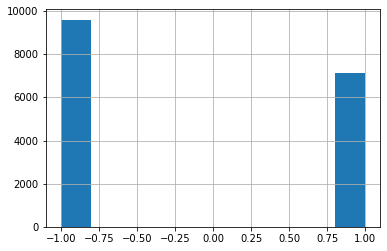

In [ ]:
complete_data['TAGS'].hist()

In [ ]:
complete_data['TAGS'].value_counts()

-1    9603
 1    7144
Name: TAGS, dtype: int64

In [ ]:
complete_data=complete_data.drop_duplicates(keep='last').reset_index()
complete_data

,index,POSTS,LABEL,TAGS
0,0,let our experienced technofunctional teams support your existing applications while you focus on your new initiatives and innovations globally based offshore hybrid or onsite applicationdevelopment technicalsupport apolis nearshore itmanangedservice managedserviceprovider,protests,-1
1,1,personally i strongly support activists and i even admire their activities send petitions to the government parliament or peacefully protest outside westminster however i do not support blocking roads to demand changes as this action does not convince people instead it makes people feel absurd and annoying especially when someone is in emergency and they want to go to hospital for treatment immediately in case they could not get treatment on time their life will be at risk and protesters who blocks roads will have to take responsibility for their actions protests just stop oil what is it and what are its goals,protests,-1
2,2,let us not be hoodwinked by just stopoils illconsidered remembrance comment they stopped because they have alienated the very people they need to support them and a grown up in the group has realised thatits a perfect example of not thinking through the consequences of actions a total lack of risk management or awareness maybe they will think through their approaches in future and make them more targetedwhat do people think would be an effective way for them to protestjuststopoil riskmanagement protests just stop oil m protests to be halted,protests,-1
3,3,what is the fallout from another morning of protests on the m massive disruption across north west kent it is not just the motorway affected this is the traffic through the usually sleepy hamlet of bean just off the bluewater junction from the a do just stop oil have a justifiable right to cause this mayhem or are their methods alienating people that could help them influence mpsjuststopoil protests traffic m northwestkent kent,protests,-1
4,4,given the forthcoming general election in nigeria how much youth participation are you witnessing especially with the lingering emotions from the endsars protestdo you think nigerian youths are ready to make count nigeria governance protests,protests,-1
...,...,...,...,...
14395,16742,le bilan de comptence estil suffisant pour crer un nouveau projet professionnelquelques lments de rponse dans ma video laspect mental et motionnel de lindividu est au cyou are dun changement de carrire russiamandinewellbeing coaching developpementpersonnel transition impactpositif pnl nlp travail healthymindset carrire reconversionprofessionnelle bilandecompetences entreprise motivation job,healthymindset,1
14396,16743,monday motivationhealthy food for energy boosting bananas avocados eggs yogurt nuts berries apples oatmeal beanslearn about my health makeover program and schedule a free minute consultation httpslnkdinemtdmmqdeatcleanbevital putyourselffirst healthcoach healthylifestyle healthyfood healthy wellnesscoach hardworkingwomennutritioncoach lifestylechange nutureyourself holistichealth healthymindset healthyhabits womensempowerment,healthymindset,1
14397,16744,it is day of our nd annual can we laugh at cancer comedy challenge rating warning language and concept this is a very atypical joke for us i was asked to write more intense cancercentric jokes of posts for people who like more raw humormy story behind the joke this is my most risque joke but it is true my husband does not carenext steps dm your email if you want to be notified of our upcoming comedycures research study and my fall podcast launchplease like and share this comedy post please also consider a donation to the comedycures foundation to support our free live and digital awardwinning therapeutic comedycures programming for patients caregivers and healthcare workerstell everyone to follow comedycures and saranneliveto learn more about my stage iv cancer story comedycures programs or to donate visit wwwcomedycuresorg or click the link in our biocomedy

In [ ]:
complete_data['POSTS'].replace('', np.nan, inplace=True)
complete_data.dropna(subset=['POSTS'], inplace=True)
complete_data

,index,POSTS,LABEL,TAGS
0,0,let our experienced technofunctional teams support your existing applications while you focus on your new initiatives and innovations globally based offshore hybrid or onsite applicationdevelopment technicalsupport apolis nearshore itmanangedservice managedserviceprovider,protests,-1
1,1,personally i strongly support activists and i even admire their activities send petitions to the government parliament or peacefully protest outside westminster however i do not support blocking roads to demand changes as this action does not convince people instead it makes people feel absurd and annoying especially when someone is in emergency and they want to go to hospital for treatment immediately in case they could not get treatment on time their life will be at risk and protesters who blocks roads will have to take responsibility for their actions protests just stop oil what is it and what are its goals,protests,-1
2,2,let us not be hoodwinked by just stopoils illconsidered remembrance comment they stopped because they have alienated the very people they need to support them and a grown up in the group has realised thatits a perfect example of not thinking through the consequences of actions a total lack of risk management or awareness maybe they will think through their approaches in future and make them more targetedwhat do people think would be an effective way for them to protestjuststopoil riskmanagement protests just stop oil m protests to be halted,protests,-1
3,3,what is the fallout from another morning of protests on the m massive disruption across north west kent it is not just the motorway affected this is the traffic through the usually sleepy hamlet of bean just off the bluewater junction from the a do just stop oil have a justifiable right to cause this mayhem or are their methods alienating people that could help them influence mpsjuststopoil protests traffic m northwestkent kent,protests,-1
4,4,given the forthcoming general election in nigeria how much youth participation are you witnessing especially with the lingering emotions from the endsars protestdo you think nigerian youths are ready to make count nigeria governance protests,protests,-1
...,...,...,...,...
14395,16742,le bilan de comptence estil suffisant pour crer un nouveau projet professionnelquelques lments de rponse dans ma video laspect mental et motionnel de lindividu est au cyou are dun changement de carrire russiamandinewellbeing coaching developpementpersonnel transition impactpositif pnl nlp travail healthymindset carrire reconversionprofessionnelle bilandecompetences entreprise motivation job,healthymindset,1
14396,16743,monday motivationhealthy food for energy boosting bananas avocados eggs yogurt nuts berries apples oatmeal beanslearn about my health makeover program and schedule a free minute consultation httpslnkdinemtdmmqdeatcleanbevital putyourselffirst healthcoach healthylifestyle healthyfood healthy wellnesscoach hardworkingwomennutritioncoach lifestylechange nutureyourself holistichealth healthymindset healthyhabits womensempowerment,healthymindset,1
14397,16744,it is day of our nd annual can we laugh at cancer comedy challenge rating warning language and concept this is a very atypical joke for us i was asked to write more intense cancercentric jokes of posts for people who like more raw humormy story behind the joke this is my most risque joke but it is true my husband does not carenext steps dm your email if you want to be notified of our upcoming comedycures research study and my fall podcast launchplease like and share this comedy post please also consider a donation to the comedycures foundation to support our free live and digital awardwinning therapeutic comedycures programming for patients caregivers and healthcare workerstell everyone to follow comedycures and saranneliveto learn more about my stage iv cancer story comedycures programs or to donate visit wwwcomedycuresorg or click the link in our biocomedy

**FastText Embeddings using pretrained embeddings (Facebook model)**

In [ ]:
!pip install fasttext
import fasttext
import fasttext.util

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 6.4 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3164886 sha256=36c1a5fe88686b60a446df79d1047cb10858dc8ea89016d6c1924dd6e8dc053a
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
# fasttext.util.download_model('en', if_exists='ignore')
# ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
# ft.save_model('/content/gdrive/MyDrive/Colab Notebooks/cc.en.100.bin')

In [ ]:
model = fasttext.load_model('/content/gdrive/MyDrive/Colab Notebooks/cc.en.100.bin')

In [ ]:
model.get_dimension()

300

In [ ]:
post_lst=complete_data['POSTS']
from tqdm import tqdm
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in tqdm(post_lst)]

100%|██████████| 14376/14376 [00:00<00:00, 39579.84it/s]


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#max_features = 2000
#tokenizer = Tokenizer(num_words = max_features, )
tokenizer = Tokenizer()
tokenizer.fit_on_texts(complete_data['POSTS'].values)
X = tokenizer.texts_to_sequences(complete_data['POSTS'].values)
X = pad_sequences(X, padding = 'post' , maxlen=100)
Y = pd.get_dummies(complete_data['TAGS']).values
#Y= complete_data['TAGS']

vocab_size = len(tokenizer.word_index)+1

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter
# rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
# x_rus, y_rus = rus.fit_resample(X, Y)

# print('original dataset shape:', Counter(Y))
# print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({-1: 8311, 1: 6065})
Resample dataset shape Counter({-1: 6065, 1: 6065})


In [ ]:
#Y_rus = pd.get_dummies(y_rus).values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(10782, 100) (10782, 2)
(3594, 100) (3594, 2)


In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = model.get_word_vector(word)
    embedding_matrix[i] = embedding_value

100%|██████████| 92516/92516 [00:01<00:00, 63553.72it/s]


In [ ]:
len(embedding_matrix),embedding_matrix.size

(92517, 27755100)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
embid_dim = 300
lstm_out = 128
lstm_model = keras.Sequential()
lstm_model.add(Embedding(vocab_size, embid_dim, weights = [embedding_matrix] , trainable = False))
lstm_model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation = 'relu'))
lstm_model.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         27755100  
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              439296    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                      

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = lstm_model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/50
54/54 [==============================] - 88s 2s/step - loss: 0.6250 - accuracy: 0.6491 - val_loss: 0.4887 - val_accuracy: 0.7660
Epoch 2/50
54/54 [==============================] - 76s 1s/step - loss: 0.4625 - accuracy: 0.7876 - val_loss: 0.4331 - val_accuracy: 0.7927
Epoch 3/50
54/54 [==============================] - 78s 1s/step - loss: 0.4131 - accuracy: 0.8107 - val_loss: 0.3973 - val_accuracy: 0.8152
Epoch 4/50
54/54 [==============================] - 78s 1s/step - loss: 0.3796 - accuracy: 0.8254 - val_loss: 0.3931 - val_accuracy: 0.8116
Epoch 5/50
54/54 [==============================] - 76s 1s/step - loss: 0.3658 - accuracy: 0.8306 - val_loss: 0.3884 - val_accuracy: 0.8297
Epoch 6/50
54/54 [==============================] - 77s 1s/step - loss: 0.3412 - accuracy: 0.8472 - val_loss: 0.3650 - val_accuracy: 0.8392
Epoch 7/50
54/54 [==============================] - 78s 1s/step - loss: 0.3347 - accuracy: 0.8479 - val_loss: 0.3651 - val_accuracy: 0.8278
Epoch 8/50
54/54 [==

In [ ]:
lstm_model.save('/content/gdrive/MyDrive/Colab Notebooks/')

In [ ]:
lstm_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         25990200  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                        

In [ ]:
Y_test_new=[]
for val in Y_test:
  if val[0]==1:
    Y_test_new.append(0)
  else:
    Y_test_new.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred = lstm_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))


57/57 [==============================] - 20s 334ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2114
           1       0.86      0.77      0.82      1480

    accuracy                           0.86      3594
   macro avg       0.86      0.84      0.85      3594
weighted avg       0.86      0.86      0.86      3594



**Testing the model on completely new/unseen data**

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Unseen_test_data/"
dir_list = os.listdir(path)
pd.set_option('display.max_colwidth', None)

In [ ]:
all_lines_list=list()
labels_list=list()
for filename in dir_list:
    file_extension_val=filename.split('.')
    file_extension=file_extension_val[1]
    if(file_extension=='txt'):
        label=filename.split('_')
        label=label[2]
        label=label.split('.')
        label=label[0]
        labels_list.append(label)
        # with open("/content/gdrive/MyDrive/Colab Notebooks/Unseen_test_data/"+filename, encoding='unicode_escape') as file_ptr:
        with open(path + "/" + filename, encoding='utf-8') as file_ptr:
            lines_temp = list()
            for line in file_ptr:
                if(line.strip()!="-----------------------------"):
                    lines_temp.append(line)
            all_lines_list.append(lines_temp)

In [ ]:
df_posts=pd.DataFrame()
labels_global_list=list()
label_index=0
for lst in all_lines_list:
    df_temp = pd.DataFrame(lst)
    df_posts=df_posts.append(df_temp,ignore_index=True,)
#     label_length=len(lst)
    for i in range(len(lst)):
        labels_global_list.append(labels_list[label_index])
    label_index=label_index+1
    
df_labels = pd.DataFrame(labels_global_list)

In [ ]:
unseen_complete_data = pd.concat([df_posts, df_labels], axis=1)
unseen_complete_data.columns = ['POSTS', 'LABEL']
unseen_complete_data

,POSTS,LABEL
0,"Does Excel run on Mac? You bet. So do Word, PowerPoint, and all the apps you need.\n",excited
1,I'm about to start a new role at Capgemini and containing myself is a real issue.Don't ask 😌#excited\n,excited
2,New chapter. #excited\n,excited
3,"Flying away from the Nest and setting off for new adventures on the other side of the planet 🗺️This day marks a couple of important milestones:- My first post ever on LinkedIn 🚀 (Is this really a milestone?)- My last day working at Nestlé- The beginning of a new and exciting journey 😍I am thrilled to announce that I’ll be moving to New Zealand as of February 2023 (#excited). Driven by the willingness to enrich ourselves as individuals, to go out of our comfort zone, to experience a new professional and personal environment, and to discover new outdoor experiences, my partner and I have decided to take that step. And why not?Since I graduated from ISIPCA in 2014, the past decade at Nestlé (wow, this sounds like a lot) which started with a 2-years internship has been incredibly rich and I feel very lucky for all the projects and experiences I went through. I met inspiring people and worked on innovative projects. From being part of the Nestlé R&D accelerator to the nesQino™️ journey, and plenty of other initiatives, I enjoyed the diversity of projects, activities, and challenges.The journey has also sometimes been punctuated with some doubts and questions, which were essential to go the extra mile. Those who know me know that I am always eager to learn new things. I don’t know yet what will come next, and I am very curious to see what the future will bring… The next two months will be busy organizing the move (and solving admin stuff), enjoying time with family and friends, recharging, and settling in New Zealand. I’ll be available for work as of February 2023 and I can’t wait to discover what New Zealand has to offer. I would love to start discussions about expatriation experiences, tips about New Zealand, potential work opportunities (including remote), …\n",excited
4,"#Excited about the great things to come from this partnership. Gracias to my Omnicom Media Group familia (Geoffrey Calabrese, Kelly Metz, Amy Darwish) and TelevisaUnivision (Daniel Aversano, Richard Bertodatti) for making this happen! #multiculturalmarketing https://lnkd.in/eVpbW7CU\n",excited
...,...,...
2579,Automate testing to catch bugs earlier in your development cycle.\n,recession2022
2580,Is Twitter about to go bankrupt?https://lnkd.in/gnQtXcnC#layoff #layoffs #laidoff #job #today #linkedin #talent #searchforjobs #techlayoffs #techjobs #technews #careers #jobopening#W2 #contract #c2c #jobopportunities #career #recruiting #openforjobopportunities #Recession #Recession2022 #Recession2023 #jobsearch #ITRecruitment#java #phython #spring #springboot #microservices #hibernate #datajpa #kafka #aws #gcp #azure #javadeveloper #Akka #scala #benchsalesrecruiters#dotnetdeveloper #dotnet #devops #powerbi #uideveloper #networking #scrummaster #data #opportunity #opportunities #fullstackdeveloper #engineering #techcommunity #layoffsandjobreductions #hiring #team #development #grateful #comment #softwareengineering #frontend#dataanalysis #businessintelligence #processimprovement #industrialengineering #newopportunities #analyst #dataengineer #opentowork #openforwork #twitter #stripe #lyft #amazon #apple #microsoft #facebook #tesla #philips #zillow #convey #jpmc #salesforce #nytimes #nypost #wsj #layoff #layoffs #laidoff #job #today#javafullstackdeveloper #javajobs #hiringimmediately #hiring #hiringtalent #marketing #project # #project #Snap #softwareengineer #work#leadership #digitalhealth #medicaldevice #biotechnology #projectAdditionally #career #opportunities #activelylooking #talent #businessintelligenceanalyst #international #students #CPT #OPT #EAD #OPTEAD #Fulltime #H1B #H4EAD #TN #TNVISA #tnjobs #H1BVISA #Citizens #GC #GCEAD #uscitizens #usajobs #usc #usajob #usa2022 #usa #usa2023 #usaitjobs #uscontractjobs 

In [ ]:
#convert to lowercase
unseen_complete_data['POSTS']=unseen_complete_data['POSTS'].str.lower()

In [ ]:
#remove html content
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].apply(lambda x: re.split('<[^<>]*>', str(x))[0])

In [ ]:
def contr(post_text):
     posts_body_list=[]
     for r in post_text:
         decontract_posts_body = contractions.fix(r)
         r = ''.join(decontract_posts_body)
         r = re.sub("\s\s+", " ", r) # remove extra spaces
         posts_body_list.append(r)
     return posts_body_list

In [ ]:
unseen_complete_data['POSTS']=contr(unseen_complete_data['POSTS'].values)

In [ ]:
#remove non-alphabetical values
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].replace('[^a-zA-Z ]', '', regex=True)

In [ ]:
import numpy as np
unseen_complete_data['TAGS']=np.where( (unseen_complete_data['LABEL']=='excited') | (unseen_complete_data['LABEL']=='hiring') | (unseen_complete_data['LABEL']=='positivity') | (unseen_complete_data['LABEL']=='positivevibes') | (unseen_complete_data['LABEL']=='grateful') | (unseen_complete_data['LABEL']=='newjob') | (unseen_complete_data['LABEL']=='blessed') | (unseen_complete_data['LABEL']=='happy') | (unseen_complete_data['LABEL']=='lmao') | (unseen_complete_data['LABEL']=='funny') | (unseen_complete_data['LABEL']=='fun') | (unseen_complete_data['LABEL']=='lol') , 1, -1)

In [ ]:
unseen_complete_data=unseen_complete_data.drop_duplicates(keep='last').reset_index()

In [ ]:
unseen_complete_data['POSTS'].replace('', np.nan, inplace=True)
unseen_complete_data.dropna(subset=['POSTS'], inplace=True)
unseen_complete_data

,index,POSTS,LABEL,TAGS
0,0,does excel run on mac you bet so do word powerpoint and all the apps you need,excited,1
1,1,i am about to start a new role at capgemini and containing myself is a real issuedo not ask excited,excited,1
2,2,new chapter excited,excited,1
3,3,flying away from the nest and setting off for new adventures on the other side of the planet this day marks a couple of important milestones my first post ever on linkedin is this really a milestone my last day working at nestl the beginning of a new and exciting journey i am thrilled to announce that i will be moving to new zealand as of february excited driven by the willingness to enrich ourselves as individuals to go out of our comfort zone to experience a new professional and personal environment and to discover new outdoor experiences my partner and i have decided to take that step and why notsince i graduated from isipca in the past decade at nestl wow this sounds like a lot which started with a years internship has been incredibly rich and i feel very lucky for all the projects and experiences i went through i met inspiring people and worked on innovative projects from being part of the nestl rd accelerator to the nesqino journey and plenty of other initiatives i enjoyed the diversity of projects activities and challengesthe journey has also sometimes been punctuated with some doubts and questions which were essential to go the extra mile those who know me know that i am always eager to learn new things i do not know yet what will come next and i am very curious to see what the future will bring the next two months will be busy organizing the move and solving admin stuff enjoying time with family and friends recharging and settling in new zealand i will be available for work as of february and i cannot wait to discover what new zealand has to offer i would love to start discussions about expatriation experiences tips about new zealand potential work opportunities including remote,excited,1
4,4,excited about the great things to come from this partnership gracias to my omnicom media group familia geoffrey calabrese kelly metz amy darwish and televisaunivision daniel aversano richard bertodatti for making this happen multiculturalmarketing httpslnkdinevpbwcu,excited,1
...,...,...,...,...
2257,2579,automate testing to catch bugs earlier in your development cycle,recession2022,-1
2258,2580,is twitter about to go bankrupthttpslnkdingnqtxcnclayoff layoffslaidoff job today linkedin talent searchforjobs techlayoffs techjobs technews careers jobopeningw contract cc jobopportunities career recruiting openforjobopportunities recession recession recession jobsearch itrecruitmentjava phython spring springboot microservices hibernate datajpa kafka aws gcp azure javadeveloper akka scala benchsalesrecruitersdotnetdeveloper dotnet devops powerbi uideveloper networking scrummaster data opportunity opportunities fullstackdeveloper engineering techcommunity layoffsandjobreductions hiring team development grateful comment softwareengineering frontenddataanalysis businessintelligence processimprovementindustrialengineering newopportunities analyst dataengineer opentowork openforwork twitter stripe lyft amazon apple microsoft facebook tesla philips zillow convey jpmc salesforce nytimes nypost wsj layoff layoffslaidoff job todayjavafullstackdeveloper javajobs hiringimmediately hiring hiringtalent marketing project project snap softwareengineer workleadership digitalhealth medicaldevice biotechnology projectadditionally career opportunities activelylooking talent businessintelligenceanalystinternational students cpt opt ead optead fulltimehb head tn tnvisa tnjobs hbvisa citizens gc gcead uscitizens usajobs usc usajob usa usa usa usaitjobs uscontractjobs usjobseeker usjobdataanalyst businessanalystbusinessanalysis analytics workplace outsourcedhr payroll onboardingpgmp productdevelopment programmanagement productmanagement projectmanagement productmanager programmanager culture remo

In [ ]:
unseen_complete_data['TAGS'].value_counts()

-1    1200
 1    1055
Name: TAGS, dtype: int64

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#max_features = 2000
#tokenizer = Tokenizer(num_words = max_features, )
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(unseen_complete_data['POSTS'].values)
X = tokenizer.texts_to_sequences(unseen_complete_data['POSTS'].values)
X = pad_sequences(X, padding = 'post' , maxlen=100)
Y = pd.get_dummies(unseen_complete_data['TAGS']).values
#Y= complete_data['TAGS'].values

vocab_size = len(tokenizer.word_index)+1

In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = model.get_word_vector(word)
    embedding_matrix[i] = embedding_value

100%|██████████| 92516/92516 [00:02<00:00, 44290.06it/s]


In [ ]:
Y_test_new_unseen=[]
for val in Y:
  if val[0]==1:
    Y_test_new_unseen.append(0)
  else:
    Y_test_new_unseen.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = lstm_model.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))


226/226 [==============================] - 18s 78ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1200
           1       0.86      0.78      0.82      1055

    accuracy                           0.84      2255
   macro avg       0.84      0.83      0.83      2255
weighted avg       0.84      0.84      0.84      2255



**Since false positives matter a lot, we focus on the precision values which are decent**

**Bidirectional LSTM using Glove embeddings**

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip -q glove.6B.zip

--2022-11-21 02:40:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-21 02:40:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-21 02:40:30--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# path_to_glove_file = os.path.join(
#     os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
# )

embeddings_index = {}
with open("/content/gdrive/MyDrive/Colab Notebooks/glove.6B.300d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
glove_embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = embeddings_index.get(word)
    if embedding_value is not None:
        glove_embedding_matrix[i] = embedding_value

100%|██████████| 92516/92516 [00:00<00:00, 570631.45it/s]


In [ ]:
glove_embedding_matrix.shape

(92517, 300)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
embid_dim = 300
lstm_out = 128
lstm_model = keras.Sequential()
lstm_model.add(Embedding(vocab_size, embid_dim, weights = [glove_embedding_matrix] , trainable = False))
lstm_model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation = 'relu'))
lstm_model.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 300)         27755100  
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              439296    
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 2)                 130       
                                                      

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = lstm_model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/50
54/54 [==============================] - 89s 2s/step - loss: 0.5533 - accuracy: 0.7101 - val_loss: 0.4389 - val_accuracy: 0.7924
Epoch 2/50
54/54 [==============================] - 78s 1s/step - loss: 0.3839 - accuracy: 0.8187 - val_loss: 0.3546 - val_accuracy: 0.8253
Epoch 3/50
54/54 [==============================] - 78s 1s/step - loss: 0.3422 - accuracy: 0.8395 - val_loss: 0.3433 - val_accuracy: 0.8344
Epoch 4/50
54/54 [==============================] - 89s 2s/step - loss: 0.3070 - accuracy: 0.8557 - val_loss: 0.3421 - val_accuracy: 0.8269
Epoch 5/50
54/54 [==============================] - 82s 2s/step - loss: 0.2820 - accuracy: 0.8702 - val_loss: 0.3172 - val_accuracy: 0.8408
Epoch 6/50
54/54 [==============================] - 86s 2s/step - loss: 0.2641 - accuracy: 0.8770 - val_loss: 0.3177 - val_accuracy: 0.8489
Epoch 7/50
54/54 [==============================] - 91s 2s/step - loss: 0.2369 - accuracy: 0.8915 - val_loss: 0.3236 - val_accuracy: 0.8389
Epoch 8/50
54/54 [==

In [ ]:
lstm_model.save('/content/gdrive/MyDrive/Colab Notebooks/Glove')

In [ ]:
lstm_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/Glove')

lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 300)         27755100  
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              439296    
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 2)                 130       
                                                      

In [ ]:
Y_test_new=[]
for val in Y_test:
  if val[0]==1:
    Y_test_new.append(0)
  else:
    Y_test_new.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred = lstm_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))


57/57 [==============================] - 15s 244ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2114
           1       0.80      0.82      0.81      1480

    accuracy                           0.84      3594
   macro avg       0.84      0.84      0.84      3594
weighted avg       0.84      0.84      0.84      3594



**Testing GLOVE on unseen test data**

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Unseen_test_data/"
dir_list = os.listdir(path)
pd.set_option('display.max_colwidth', None)

In [ ]:
all_lines_list=list()
labels_list=list()
for filename in dir_list:
    file_extension_val=filename.split('.')
    file_extension=file_extension_val[1]
    if(file_extension=='txt'):
        label=filename.split('_')
        label=label[2]
        label=label.split('.')
        label=label[0]
        labels_list.append(label)
        # with open("/content/gdrive/MyDrive/Colab Notebooks/Unseen_test_data/"+filename, encoding='unicode_escape') as file_ptr:
        with open(path + "/" + filename, encoding='utf-8') as file_ptr:
            lines_temp = list()
            for line in file_ptr:
                if(line.strip()!="-----------------------------"):
                    lines_temp.append(line)
            all_lines_list.append(lines_temp)

In [ ]:
df_posts=pd.DataFrame()
labels_global_list=list()
label_index=0
for lst in all_lines_list:
    df_temp = pd.DataFrame(lst)
    df_posts=df_posts.append(df_temp,ignore_index=True,)
#     label_length=len(lst)
    for i in range(len(lst)):
        labels_global_list.append(labels_list[label_index])
    label_index=label_index+1
    
df_labels = pd.DataFrame(labels_global_list)

In [ ]:
unseen_complete_data = pd.concat([df_posts, df_labels], axis=1)
unseen_complete_data.columns = ['POSTS', 'LABEL']
unseen_complete_data

,POSTS,LABEL
0,"Does Excel run on Mac? You bet. So do Word, PowerPoint, and all the apps you need.\n",excited
1,I'm about to start a new role at Capgemini and containing myself is a real issue.Don't ask 😌#excited\n,excited
2,New chapter. #excited\n,excited
3,"Flying away from the Nest and setting off for new adventures on the other side of the planet 🗺️This day marks a couple of important milestones:- My first post ever on LinkedIn 🚀 (Is this really a milestone?)- My last day working at Nestlé- The beginning of a new and exciting journey 😍I am thrilled to announce that I’ll be moving to New Zealand as of February 2023 (#excited). Driven by the willingness to enrich ourselves as individuals, to go out of our comfort zone, to experience a new professional and personal environment, and to discover new outdoor experiences, my partner and I have decided to take that step. And why not?Since I graduated from ISIPCA in 2014, the past decade at Nestlé (wow, this sounds like a lot) which started with a 2-years internship has been incredibly rich and I feel very lucky for all the projects and experiences I went through. I met inspiring people and worked on innovative projects. From being part of the Nestlé R&D accelerator to the nesQino™️ journey, and plenty of other initiatives, I enjoyed the diversity of projects, activities, and challenges.The journey has also sometimes been punctuated with some doubts and questions, which were essential to go the extra mile. Those who know me know that I am always eager to learn new things. I don’t know yet what will come next, and I am very curious to see what the future will bring… The next two months will be busy organizing the move (and solving admin stuff), enjoying time with family and friends, recharging, and settling in New Zealand. I’ll be available for work as of February 2023 and I can’t wait to discover what New Zealand has to offer. I would love to start discussions about expatriation experiences, tips about New Zealand, potential work opportunities (including remote), …\n",excited
4,"#Excited about the great things to come from this partnership. Gracias to my Omnicom Media Group familia (Geoffrey Calabrese, Kelly Metz, Amy Darwish) and TelevisaUnivision (Daniel Aversano, Richard Bertodatti) for making this happen! #multiculturalmarketing https://lnkd.in/eVpbW7CU\n",excited
...,...,...
2579,Automate testing to catch bugs earlier in your development cycle.\n,recession2022
2580,Is Twitter about to go bankrupt?https://lnkd.in/gnQtXcnC#layoff #layoffs #laidoff #job #today #linkedin #talent #searchforjobs #techlayoffs #techjobs #technews #careers #jobopening#W2 #contract #c2c #jobopportunities #career #recruiting #openforjobopportunities #Recession #Recession2022 #Recession2023 #jobsearch #ITRecruitment#java #phython #spring #springboot #microservices #hibernate #datajpa #kafka #aws #gcp #azure #javadeveloper #Akka #scala #benchsalesrecruiters#dotnetdeveloper #dotnet #devops #powerbi #uideveloper #networking #scrummaster #data #opportunity #opportunities #fullstackdeveloper #engineering #techcommunity #layoffsandjobreductions #hiring #team #development #grateful #comment #softwareengineering #frontend#dataanalysis #businessintelligence #processimprovement #industrialengineering #newopportunities #analyst #dataengineer #opentowork #openforwork #twitter #stripe #lyft #amazon #apple #microsoft #facebook #tesla #philips #zillow #convey #jpmc #salesforce #nytimes #nypost #wsj #layoff #layoffs #laidoff #job #today#javafullstackdeveloper #javajobs #hiringimmediately #hiring #hiringtalent #marketing #project # #project #Snap #softwareengineer #work#leadership #digitalhealth #medicaldevice #biotechnology #projectAdditionally #career #opportunities #activelylooking #talent #businessintelligenceanalyst #international #students #CPT #OPT #EAD #OPTEAD #Fulltime #H1B #H4EAD #TN #TNVISA #tnjobs #H1BVISA #Citizens #GC #GCEAD #uscitizens #usajobs #usc #usajob #usa2022 #usa #usa2023 #usaitjobs #uscontractjobs 

In [ ]:
#convert to lowercase
unseen_complete_data['POSTS']=unseen_complete_data['POSTS'].str.lower()

In [ ]:
#remove html content
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].apply(lambda x: re.split('<[^<>]*>', str(x))[0])

In [ ]:
def contr(post_text):
     posts_body_list=[]
     for r in post_text:
         decontract_posts_body = contractions.fix(r)
         r = ''.join(decontract_posts_body)
         r = re.sub("\s\s+", " ", r) # remove extra spaces
         posts_body_list.append(r)
     return posts_body_list

In [ ]:
unseen_complete_data['POSTS']=contr(unseen_complete_data['POSTS'].values)

In [ ]:
#remove non-alphabetical values
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].replace('[^a-zA-Z ]', '', regex=True)

In [ ]:
import numpy as np
unseen_complete_data['TAGS']=np.where( (unseen_complete_data['LABEL']=='excited') | (unseen_complete_data['LABEL']=='hiring') | (unseen_complete_data['LABEL']=='positivity') | (unseen_complete_data['LABEL']=='positivevibes') | (unseen_complete_data['LABEL']=='grateful') | (unseen_complete_data['LABEL']=='newjob') | (unseen_complete_data['LABEL']=='blessed') | (unseen_complete_data['LABEL']=='happy') | (unseen_complete_data['LABEL']=='lmao') | (unseen_complete_data['LABEL']=='funny') | (unseen_complete_data['LABEL']=='fun') | (unseen_complete_data['LABEL']=='lol') , 1, -1)

In [ ]:
unseen_complete_data=unseen_complete_data.drop_duplicates(keep='last').reset_index()

In [ ]:
unseen_complete_data['POSTS'].replace('', np.nan, inplace=True)
unseen_complete_data.dropna(subset=['POSTS'], inplace=True)
unseen_complete_data

,index,POSTS,LABEL,TAGS
0,0,does excel run on mac you bet so do word powerpoint and all the apps you need,excited,1
1,1,i am about to start a new role at capgemini and containing myself is a real issuedo not ask excited,excited,1
2,2,new chapter excited,excited,1
3,3,flying away from the nest and setting off for new adventures on the other side of the planet this day marks a couple of important milestones my first post ever on linkedin is this really a milestone my last day working at nestl the beginning of a new and exciting journey i am thrilled to announce that i will be moving to new zealand as of february excited driven by the willingness to enrich ourselves as individuals to go out of our comfort zone to experience a new professional and personal environment and to discover new outdoor experiences my partner and i have decided to take that step and why notsince i graduated from isipca in the past decade at nestl wow this sounds like a lot which started with a years internship has been incredibly rich and i feel very lucky for all the projects and experiences i went through i met inspiring people and worked on innovative projects from being part of the nestl rd accelerator to the nesqino journey and plenty of other initiatives i enjoyed the diversity of projects activities and challengesthe journey has also sometimes been punctuated with some doubts and questions which were essential to go the extra mile those who know me know that i am always eager to learn new things i do not know yet what will come next and i am very curious to see what the future will bring the next two months will be busy organizing the move and solving admin stuff enjoying time with family and friends recharging and settling in new zealand i will be available for work as of february and i cannot wait to discover what new zealand has to offer i would love to start discussions about expatriation experiences tips about new zealand potential work opportunities including remote,excited,1
4,4,excited about the great things to come from this partnership gracias to my omnicom media group familia geoffrey calabrese kelly metz amy darwish and televisaunivision daniel aversano richard bertodatti for making this happen multiculturalmarketing httpslnkdinevpbwcu,excited,1
...,...,...,...,...
2257,2579,automate testing to catch bugs earlier in your development cycle,recession2022,-1
2258,2580,is twitter about to go bankrupthttpslnkdingnqtxcnclayoff layoffslaidoff job today linkedin talent searchforjobs techlayoffs techjobs technews careers jobopeningw contract cc jobopportunities career recruiting openforjobopportunities recession recession recession jobsearch itrecruitmentjava phython spring springboot microservices hibernate datajpa kafka aws gcp azure javadeveloper akka scala benchsalesrecruitersdotnetdeveloper dotnet devops powerbi uideveloper networking scrummaster data opportunity opportunities fullstackdeveloper engineering techcommunity layoffsandjobreductions hiring team development grateful comment softwareengineering frontenddataanalysis businessintelligence processimprovementindustrialengineering newopportunities analyst dataengineer opentowork openforwork twitter stripe lyft amazon apple microsoft facebook tesla philips zillow convey jpmc salesforce nytimes nypost wsj layoff layoffslaidoff job todayjavafullstackdeveloper javajobs hiringimmediately hiring hiringtalent marketing project project snap softwareengineer workleadership digitalhealth medicaldevice biotechnology projectadditionally career opportunities activelylooking talent businessintelligenceanalystinternational students cpt opt ead optead fulltimehb head tn tnvisa tnjobs hbvisa citizens gc gcead uscitizens usajobs usc usajob usa usa usa usaitjobs uscontractjobs usjobseeker usjobdataanalyst businessanalystbusinessanalysis analytics workplace outsourcedhr payroll onboardingpgmp productdevelopment programmanagement productmanagement projectmanagement productmanager programmanager culture remo

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#max_features = 2000
#tokenizer = Tokenizer(num_words = max_features, )
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(unseen_complete_data['POSTS'].values)
X = tokenizer.texts_to_sequences(unseen_complete_data['POSTS'].values)
X = pad_sequences(X, padding = 'post' , maxlen=100)
Y = pd.get_dummies(unseen_complete_data['TAGS']).values
#Y= complete_data['TAGS'].values

vocab_size = len(tokenizer.word_index)+1

In [ ]:
Y_test_new_unseen=[]
for val in Y:
  if val[0]==1:
    Y_test_new_unseen.append(0)
  else:
    Y_test_new_unseen.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = lstm_model.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))


226/226 [==============================] - 15s 66ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1200
           1       0.85      0.83      0.84      1055

    accuracy                           0.85      2255
   macro avg       0.85      0.85      0.85      2255
weighted avg       0.85      0.85      0.85      2255



**LSTM with FastText Embeddings**

In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = model.get_word_vector(word)
    embedding_matrix[i] = embedding_value

100%|██████████| 92516/92516 [00:05<00:00, 15501.59it/s]


In [ ]:
len(embedding_matrix),embedding_matrix.size

(92517, 27755100)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
embid_dim = 300
lstm_out = 128
vanilla_lstm_model = keras.Sequential()
vanilla_lstm_model.add(Embedding(vocab_size, embid_dim, weights = [embedding_matrix] , trainable = False))
vanilla_lstm_model.add(LSTM(lstm_out, dropout=0.2))
vanilla_lstm_model.add(Dense(128, activation = 'relu'))
vanilla_lstm_model.add(Dropout(0.5))
vanilla_lstm_model.add(Dense(64, activation = 'relu'))
vanilla_lstm_model.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
vanilla_lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 300)         27755100  
                                                                 
 lstm_12 (LSTM)              (None, 128)               219648    
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 2)                 130       
                                                                 
Total params: 27,999,646
Trainable params: 244,546
Non

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
vanilla_lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = vanilla_lstm_model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/50
54/54 [==============================] - 41s 718ms/step - loss: 0.6597 - accuracy: 0.5914 - val_loss: 0.5854 - val_accuracy: 0.6981
Epoch 2/50
54/54 [==============================] - 42s 784ms/step - loss: 0.4752 - accuracy: 0.7781 - val_loss: 0.4445 - val_accuracy: 0.8077
Epoch 3/50
54/54 [==============================] - 39s 716ms/step - loss: 0.4136 - accuracy: 0.8110 - val_loss: 0.4001 - val_accuracy: 0.8264
Epoch 4/50
54/54 [==============================] - 39s 722ms/step - loss: 0.3901 - accuracy: 0.8266 - val_loss: 0.3810 - val_accuracy: 0.8230
Epoch 5/50
54/54 [==============================] - 38s 703ms/step - loss: 0.3709 - accuracy: 0.8305 - val_loss: 0.3689 - val_accuracy: 0.8300
Epoch 6/50
54/54 [==============================] - 38s 704ms/step - loss: 0.3567 - accuracy: 0.8371 - val_loss: 0.3543 - val_accuracy: 0.8350
Epoch 7/50
54/54 [==============================] - 38s 702ms/step - loss: 0.3450 - accuracy: 0.8412 - val_loss: 0.3798 - val_accuracy: 0.8342

In [ ]:
vanilla_lstm_model.save('/content/gdrive/MyDrive/Colab Notebooks/')

In [ ]:
Y_test_new=[]
for val in Y_test:
  if val[0]==1:
    Y_test_new.append(0)
  else:
    Y_test_new.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred = vanilla_lstm_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))


57/57 [==============================] - 7s 110ms/step
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2114
           1       0.90      0.75      0.82      1480

    accuracy                           0.86      3594
   macro avg       0.87      0.85      0.86      3594
weighted avg       0.87      0.86      0.86      3594



**Vanilla LSTM model on completely unseen data with FastText Embeddings**

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Unseen_test_data/"
dir_list = os.listdir(path)
pd.set_option('display.max_colwidth', None)

In [ ]:
all_lines_list=list()
labels_list=list()
for filename in dir_list:
    file_extension_val=filename.split('.')
    file_extension=file_extension_val[1]
    if(file_extension=='txt'):
        label=filename.split('_')
        label=label[2]
        label=label.split('.')
        label=label[0]
        labels_list.append(label)
        # with open("/content/gdrive/MyDrive/Colab Notebooks/Unseen_test_data/"+filename, encoding='unicode_escape') as file_ptr:
        with open(path + "/" + filename, encoding='utf-8') as file_ptr:
            lines_temp = list()
            for line in file_ptr:
                if(line.strip()!="-----------------------------"):
                    lines_temp.append(line)
            all_lines_list.append(lines_temp)

In [ ]:
df_posts=pd.DataFrame()
labels_global_list=list()
label_index=0
for lst in all_lines_list:
    df_temp = pd.DataFrame(lst)
    df_posts=df_posts.append(df_temp,ignore_index=True,)
#     label_length=len(lst)
    for i in range(len(lst)):
        labels_global_list.append(labels_list[label_index])
    label_index=label_index+1
    
df_labels = pd.DataFrame(labels_global_list)

In [ ]:
unseen_complete_data = pd.concat([df_posts, df_labels], axis=1)
unseen_complete_data.columns = ['POSTS', 'LABEL']
unseen_complete_data

,POSTS,LABEL
0,"Does Excel run on Mac? You bet. So do Word, PowerPoint, and all the apps you need.\n",excited
1,I'm about to start a new role at Capgemini and containing myself is a real issue.Don't ask 😌#excited\n,excited
2,New chapter. #excited\n,excited
3,"Flying away from the Nest and setting off for new adventures on the other side of the planet 🗺️This day marks a couple of important milestones:- My first post ever on LinkedIn 🚀 (Is this really a milestone?)- My last day working at Nestlé- The beginning of a new and exciting journey 😍I am thrilled to announce that I’ll be moving to New Zealand as of February 2023 (#excited). Driven by the willingness to enrich ourselves as individuals, to go out of our comfort zone, to experience a new professional and personal environment, and to discover new outdoor experiences, my partner and I have decided to take that step. And why not?Since I graduated from ISIPCA in 2014, the past decade at Nestlé (wow, this sounds like a lot) which started with a 2-years internship has been incredibly rich and I feel very lucky for all the projects and experiences I went through. I met inspiring people and worked on innovative projects. From being part of the Nestlé R&D accelerator to the nesQino™️ journey, and plenty of other initiatives, I enjoyed the diversity of projects, activities, and challenges.The journey has also sometimes been punctuated with some doubts and questions, which were essential to go the extra mile. Those who know me know that I am always eager to learn new things. I don’t know yet what will come next, and I am very curious to see what the future will bring… The next two months will be busy organizing the move (and solving admin stuff), enjoying time with family and friends, recharging, and settling in New Zealand. I’ll be available for work as of February 2023 and I can’t wait to discover what New Zealand has to offer. I would love to start discussions about expatriation experiences, tips about New Zealand, potential work opportunities (including remote), …\n",excited
4,"#Excited about the great things to come from this partnership. Gracias to my Omnicom Media Group familia (Geoffrey Calabrese, Kelly Metz, Amy Darwish) and TelevisaUnivision (Daniel Aversano, Richard Bertodatti) for making this happen! #multiculturalmarketing https://lnkd.in/eVpbW7CU\n",excited
...,...,...
2579,Automate testing to catch bugs earlier in your development cycle.\n,recession2022
2580,Is Twitter about to go bankrupt?https://lnkd.in/gnQtXcnC#layoff #layoffs #laidoff #job #today #linkedin #talent #searchforjobs #techlayoffs #techjobs #technews #careers #jobopening#W2 #contract #c2c #jobopportunities #career #recruiting #openforjobopportunities #Recession #Recession2022 #Recession2023 #jobsearch #ITRecruitment#java #phython #spring #springboot #microservices #hibernate #datajpa #kafka #aws #gcp #azure #javadeveloper #Akka #scala #benchsalesrecruiters#dotnetdeveloper #dotnet #devops #powerbi #uideveloper #networking #scrummaster #data #opportunity #opportunities #fullstackdeveloper #engineering #techcommunity #layoffsandjobreductions #hiring #team #development #grateful #comment #softwareengineering #frontend#dataanalysis #businessintelligence #processimprovement #industrialengineering #newopportunities #analyst #dataengineer #opentowork #openforwork #twitter #stripe #lyft #amazon #apple #microsoft #facebook #tesla #philips #zillow #convey #jpmc #salesforce #nytimes #nypost #wsj #layoff #layoffs #laidoff #job #today#javafullstackdeveloper #javajobs #hiringimmediately #hiring #hiringtalent #marketing #project # #project #Snap #softwareengineer #work#leadership #digitalhealth #medicaldevice #biotechnology #projectAdditionally #career #opportunities #activelylooking #talent #businessintelligenceanalyst #international #students #CPT #OPT #EAD #OPTEAD #Fulltime #H1B #H4EAD #TN #TNVISA #tnjobs #H1BVISA #Citizens #GC #GCEAD #uscitizens #usajobs #usc #usajob #usa2022 #usa #usa2023 #usaitjobs #uscontractjobs 

In [ ]:
#convert to lowercase
unseen_complete_data['POSTS']=unseen_complete_data['POSTS'].str.lower()

In [ ]:
#remove html content
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].apply(lambda x: re.split('<[^<>]*>', str(x))[0])

In [ ]:
def contr(post_text):
     posts_body_list=[]
     for r in post_text:
         decontract_posts_body = contractions.fix(r)
         r = ''.join(decontract_posts_body)
         r = re.sub("\s\s+", " ", r) # remove extra spaces
         posts_body_list.append(r)
     return posts_body_list

In [ ]:
unseen_complete_data['POSTS']=contr(unseen_complete_data['POSTS'].values)

In [ ]:
#remove non-alphabetical values
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].replace('[^a-zA-Z ]', '', regex=True)

In [ ]:
import numpy as np
unseen_complete_data['TAGS']=np.where( (unseen_complete_data['LABEL']=='excited') | (unseen_complete_data['LABEL']=='hiring') | (unseen_complete_data['LABEL']=='positivity') | (unseen_complete_data['LABEL']=='positivevibes') | (unseen_complete_data['LABEL']=='grateful') | (unseen_complete_data['LABEL']=='newjob') | (unseen_complete_data['LABEL']=='blessed') | (unseen_complete_data['LABEL']=='happy') | (unseen_complete_data['LABEL']=='lmao') | (unseen_complete_data['LABEL']=='funny') | (unseen_complete_data['LABEL']=='fun') | (unseen_complete_data['LABEL']=='lol') , 1, -1)

In [ ]:
unseen_complete_data=unseen_complete_data.drop_duplicates(keep='last').reset_index()

In [ ]:
unseen_complete_data['POSTS'].replace('', np.nan, inplace=True)
unseen_complete_data.dropna(subset=['POSTS'], inplace=True)
unseen_complete_data

In [ ]:
unseen_complete_data['TAGS'].value_counts()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#max_features = 2000
#tokenizer = Tokenizer(num_words = max_features, )
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(unseen_complete_data['POSTS'].values)
X = tokenizer.texts_to_sequences(unseen_complete_data['POSTS'].values)
X = pad_sequences(X, padding = 'post' , maxlen=100)
Y = pd.get_dummies(unseen_complete_data['TAGS']).values
#Y= complete_data['TAGS'].values

vocab_size = len(tokenizer.word_index)+1

In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = model.get_word_vector(word)
    embedding_matrix[i] = embedding_value

100%|██████████| 92516/92516 [00:02<00:00, 33315.13it/s]


In [ ]:
Y_test_new_unseen=[]
for val in Y:
  if val[0]==1:
    Y_test_new_unseen.append(0)
  else:
    Y_test_new_unseen.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = vanilla_lstm_model.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))


226/226 [==============================] - 13s 57ms/step
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1200
           1       0.90      0.75      0.82      1055

    accuracy                           0.84      2255
   macro avg       0.85      0.84      0.84      2255
weighted avg       0.85      0.84      0.84      2255



**Vanilla LSTM model with Glove Embeddings**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
embid_dim = 300
lstm_out = 128
glove_vanialla_lstm_model = keras.Sequential()
glove_vanialla_lstm_model.add(Embedding(vocab_size, embid_dim, weights = [glove_embedding_matrix] , trainable = False))
glove_vanialla_lstm_model.add(LSTM(lstm_out, dropout=0.2))
glove_vanialla_lstm_model.add(Dense(128, activation = 'relu'))
glove_vanialla_lstm_model.add(Dropout(0.5))
glove_vanialla_lstm_model.add(Dense(64, activation = 'relu'))
glove_vanialla_lstm_model.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
glove_vanialla_lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 300)         27755100  
                                                                 
 lstm_14 (LSTM)              (None, 128)               219648    
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 2)                 130       
                                                                 
Total params: 27,999,646
Trainable params: 244,546
No

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
glove_vanialla_lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = glove_vanialla_lstm_model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/50
54/54 [==============================] - 49s 854ms/step - loss: 0.5955 - accuracy: 0.6646 - val_loss: 0.4536 - val_accuracy: 0.7902
Epoch 2/50
54/54 [==============================] - 41s 748ms/step - loss: 0.4195 - accuracy: 0.7996 - val_loss: 0.3922 - val_accuracy: 0.8175
Epoch 3/50
54/54 [==============================] - 38s 713ms/step - loss: 0.4299 - accuracy: 0.7865 - val_loss: 0.4367 - val_accuracy: 0.7938
Epoch 4/50
54/54 [==============================] - 38s 703ms/step - loss: 0.3640 - accuracy: 0.8218 - val_loss: 0.3625 - val_accuracy: 0.8086
Epoch 5/50
54/54 [==============================] - 39s 720ms/step - loss: 0.3281 - accuracy: 0.8340 - val_loss: 0.3501 - val_accuracy: 0.8395
Epoch 6/50
54/54 [==============================] - 39s 718ms/step - loss: 0.3067 - accuracy: 0.8527 - val_loss: 0.3762 - val_accuracy: 0.8097
Epoch 7/50
54/54 [==============================] - 42s 789ms/step - loss: 0.3020 - accuracy: 0.8506 - val_loss: 0.3471 - val_accuracy: 0.8514

In [ ]:
glove_vanialla_lstm_model.save('/content/gdrive/MyDrive/Colab Notebooks/Glove')

In [ ]:
glove_vanialla_lstm_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/Glove')

glove_vanialla_lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 300)         27755100  
                                                                 
 lstm_14 (LSTM)              (None, 128)               219648    
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 2)                 130       
                                                                 
Total params: 27,999,646
Trainable params: 244,546
No

In [ ]:
Y_test_new=[]
for val in Y_test:
  if val[0]==1:
    Y_test_new.append(0)
  else:
    Y_test_new.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred = glove_vanialla_lstm_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))


57/57 [==============================] - 7s 109ms/step
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2114
           1       0.86      0.78      0.82      1480

    accuracy                           0.86      3594
   macro avg       0.86      0.85      0.85      3594
weighted avg       0.86      0.86      0.86      3594



**Vaniall LSTM with Glove Embeddings on Unseen Test Data**

In [ ]:
#convert to lowercase
unseen_complete_data['POSTS']=unseen_complete_data['POSTS'].str.lower()

In [ ]:
#remove html content
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].apply(lambda x: re.split('<[^<>]*>', str(x))[0])

In [ ]:
def contr(post_text):
     posts_body_list=[]
     for r in post_text:
         decontract_posts_body = contractions.fix(r)
         r = ''.join(decontract_posts_body)
         r = re.sub("\s\s+", " ", r) # remove extra spaces
         posts_body_list.append(r)
     return posts_body_list

In [ ]:
unseen_complete_data['POSTS']=contr(unseen_complete_data['POSTS'].values)

In [ ]:
#remove non-alphabetical values
unseen_complete_data['POSTS'] = unseen_complete_data['POSTS'].replace('[^a-zA-Z ]', '', regex=True)

In [ ]:
import numpy as np
unseen_complete_data['TAGS']=np.where( (unseen_complete_data['LABEL']=='excited') | (unseen_complete_data['LABEL']=='hiring') | (unseen_complete_data['LABEL']=='positivity') | (unseen_complete_data['LABEL']=='positivevibes') | (unseen_complete_data['LABEL']=='grateful') | (unseen_complete_data['LABEL']=='newjob') | (unseen_complete_data['LABEL']=='blessed') | (unseen_complete_data['LABEL']=='happy') | (unseen_complete_data['LABEL']=='lmao') | (unseen_complete_data['LABEL']=='funny') | (unseen_complete_data['LABEL']=='fun') | (unseen_complete_data['LABEL']=='lol') , 1, -1)

In [ ]:
unseen_complete_data=unseen_complete_data.drop_duplicates(keep='last').reset_index()

In [ ]:
unseen_complete_data['POSTS'].replace('', np.nan, inplace=True)
unseen_complete_data.dropna(subset=['POSTS'], inplace=True)
unseen_complete_data

,level_0,index,POSTS,LABEL,TAGS
0,0,0,does excel run on mac you bet so do word powerpoint and all the apps you need,excited,1
1,1,1,i am about to start a new role at capgemini and containing myself is a real issuedo not ask excited,excited,1
2,2,2,new chapter excited,excited,1
3,3,3,flying away from the nest and setting off for new adventures on the other side of the planet this day marks a couple of important milestones my first post ever on linkedin is this really a milestone my last day working at nestl the beginning of a new and exciting journey i am thrilled to announce that i will be moving to new zealand as of february excited driven by the willingness to enrich ourselves as individuals to go out of our comfort zone to experience a new professional and personal environment and to discover new outdoor experiences my partner and i have decided to take that step and why notsince i graduated from isipca in the past decade at nestl wow this sounds like a lot which started with a years internship has been incredibly rich and i feel very lucky for all the projects and experiences i went through i met inspiring people and worked on innovative projects from being part of the nestl rd accelerator to the nesqino journey and plenty of other initiatives i enjoyed the diversity of projects activities and challengesthe journey has also sometimes been punctuated with some doubts and questions which were essential to go the extra mile those who know me know that i am always eager to learn new things i do not know yet what will come next and i am very curious to see what the future will bring the next two months will be busy organizing the move and solving admin stuff enjoying time with family and friends recharging and settling in new zealand i will be available for work as of february and i cannot wait to discover what new zealand has to offer i would love to start discussions about expatriation experiences tips about new zealand potential work opportunities including remote,excited,1
4,4,4,excited about the great things to come from this partnership gracias to my omnicom media group familia geoffrey calabrese kelly metz amy darwish and televisaunivision daniel aversano richard bertodatti for making this happen multiculturalmarketing httpslnkdinevpbwcu,excited,1
...,...,...,...,...,...
2250,2257,2579,automate testing to catch bugs earlier in your development cycle,recession2022,-1
2251,2258,2580,is twitter about to go bankrupthttpslnkdingnqtxcnclayoff layoffslaidoff job today linkedin talent searchforjobs techlayoffs techjobs technews careers jobopeningw contract cc jobopportunities career recruiting openforjobopportunities recession recession recession jobsearch itrecruitmentjava phython spring springboot microservices hibernate datajpa kafka aws gcp azure javadeveloper akka scala benchsalesrecruitersdotnetdeveloper dotnet devops powerbi uideveloper networking scrummaster data opportunity opportunities fullstackdeveloper engineering techcommunity layoffsandjobreductions hiring team development grateful comment softwareengineering frontenddataanalysis businessintelligence processimprovementindustrialengineering newopportunities analyst dataengineer opentowork openforwork twitter stripe lyft amazon apple microsoft facebook tesla philips zillow convey jpmc salesforce nytimes nypost wsj layoff layoffslaidoff job todayjavafullstackdeveloper javajobs hiringimmediately hiring hiringtalent marketing project project snap softwareengineer workleadership digitalhealth medicaldevice biotechnology projectadditionally career opportunities activelylooking talent businessintelligenceanalystinternational students cpt opt ead optead fulltimehb head tn tnvisa tnjobs hbvisa citizens gc gcead uscitizens usajobs usc usajob usa usa usa usaitjobs uscontractjobs usjobseeker usjobdataanalyst businessanalystbusinessanalysis analytics workplace outsourcedhr payroll onboardingpgmp productdevelopment programmanagement productmanagement projectmanagement productman

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#max_features = 2000
#tokenizer = Tokenizer(num_words = max_features, )
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(unseen_complete_data['POSTS'].values)
X = tokenizer.texts_to_sequences(unseen_complete_data['POSTS'].values)
X = pad_sequences(X, padding = 'post' , maxlen=100)
Y = pd.get_dummies(unseen_complete_data['TAGS']).values
#Y= complete_data['TAGS'].values

vocab_size = len(tokenizer.word_index)+1

In [ ]:
Y_test_new_unseen=[]
for val in Y:
  if val[0]==1:
    Y_test_new_unseen.append(0)
  else:
    Y_test_new_unseen.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = glove_vanialla_lstm_model.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))


226/226 [==============================] - 9s 39ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1200
           1       0.88      0.79      0.83      1055

    accuracy                           0.85      2255
   macro avg       0.86      0.85      0.85      2255
weighted avg       0.85      0.85      0.85      2255



**Stacked GRU (More complex models) with FastText Embeddings**

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout, GRU
embedd_dim = 300
stacked_gru = 128
stacked_gru = keras.Sequential()
stacked_gru.add(Embedding(vocab_size, embedd_dim, weights = [embedding_matrix] , trainable = False))
stacked_gru.add(Bidirectional(GRU(128, dropout=0.2, return_sequences = True)))
stacked_gru.add(Bidirectional(GRU(64, dropout=0.2)))
stacked_gru.add(Dense(128, activation = 'relu'))
stacked_gru.add(Dropout(0.5))
stacked_gru.add(Dense(64, activation = 'relu'))
stacked_gru.add(Dropout(0.5))
stacked_gru.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
stacked_gru.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         27755100  
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        330240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
stacked_gru.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = stacked_gru.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/50
54/54 [==============================] - 103s 2s/step - loss: 0.6624 - accuracy: 0.5970 - val_loss: 0.5587 - val_accuracy: 0.7204
Epoch 2/50
54/54 [==============================] - 94s 2s/step - loss: 0.5038 - accuracy: 0.7634 - val_loss: 0.4335 - val_accuracy: 0.8011
Epoch 3/50
54/54 [==============================] - 93s 2s/step - loss: 0.4287 - accuracy: 0.8101 - val_loss: 0.4062 - val_accuracy: 0.8114
Epoch 4/50
54/54 [==============================] - 91s 2s/step - loss: 0.3970 - accuracy: 0.8225 - val_loss: 0.4054 - val_accuracy: 0.8024
Epoch 5/50
54/54 [==============================] - 93s 2s/step - loss: 0.3637 - accuracy: 0.8348 - val_loss: 0.3555 - val_accuracy: 0.8347
Epoch 6/50
54/54 [==============================] - 93s 2s/step - loss: 0.3319 - accuracy: 0.8460 - val_loss: 0.3525 - val_accuracy: 0.8347
Epoch 7/50
54/54 [==============================] - 91s 2s/step - loss: 0.3328 - accuracy: 0.8472 - val_loss: 0.3706 - val_accuracy: 0.8097
Epoch 8/50
54/54 [=

In [ ]:
stacked_gru.save('/content/gdrive/MyDrive/Colab Notebooks/StackedGRU')

In [ ]:
Y_test_new=[]
for val in Y_test:
  if val[0]==1:
    Y_test_new.append(0)
  else:
    Y_test_new.append(1)

In [ ]:
from sklearn.metrics import classification_report

y_pred = stacked_gru.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))


57/57 [==============================] - 14s 222ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2114
           1       0.87      0.81      0.84      1480

    accuracy                           0.87      3594
   macro avg       0.87      0.86      0.87      3594
weighted avg       0.87      0.87      0.87      3594



**Stacked GRU with FastText Embeddings on unseen data**

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = stacked_gru.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))

226/226 [==============================] - 13s 59ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1200
           1       0.87      0.81      0.84      1055

    accuracy                           0.86      2255
   macro avg       0.86      0.85      0.86      2255
weighted avg       0.86      0.86      0.86      2255



**Stacked GRU with Glove Embeddings**

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout, GRU
embedd_dim = 300
stacked_gru_glove = 128
stacked_gru_glove = keras.Sequential()
stacked_gru_glove.add(Embedding(vocab_size, embedd_dim, weights = [glove_embedding_matrix] , trainable = False))
stacked_gru_glove.add(Bidirectional(GRU(128, dropout=0.2, return_sequences = True)))
stacked_gru_glove.add(Bidirectional(GRU(64, dropout=0.2)))
stacked_gru_glove.add(Dense(128, activation = 'relu'))
stacked_gru_glove.add(Dropout(0.5))
stacked_gru_glove.add(Dense(64, activation = 'relu'))
stacked_gru_glove.add(Dropout(0.5))
stacked_gru_glove.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
stacked_gru_glove.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         27755100  
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 256)        330240    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
stacked_gru_glove.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = stacked_gru_glove.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/50
54/54 [==============================] - 107s 2s/step - loss: 0.6175 - accuracy: 0.6539 - val_loss: 0.4915 - val_accuracy: 0.7571
Epoch 2/50
54/54 [==============================] - 94s 2s/step - loss: 0.4426 - accuracy: 0.7986 - val_loss: 0.3679 - val_accuracy: 0.8152
Epoch 3/50
54/54 [==============================] - 95s 2s/step - loss: 0.3384 - accuracy: 0.8383 - val_loss: 0.3381 - val_accuracy: 0.8358
Epoch 4/50
54/54 [==============================] - 97s 2s/step - loss: 0.3005 - accuracy: 0.8593 - val_loss: 0.3227 - val_accuracy: 0.8331
Epoch 5/50
54/54 [==============================] - 93s 2s/step - loss: 0.2709 - accuracy: 0.8702 - val_loss: 0.3172 - val_accuracy: 0.8453
Epoch 6/50
54/54 [==============================] - 93s 2s/step - loss: 0.2515 - accuracy: 0.8842 - val_loss: 0.3021 - val_accuracy: 0.8528
Epoch 7/50
54/54 [==============================] - 95s 2s/step - loss: 0.2321 - accuracy: 0.8968 - val_loss: 0.3402 - val_accuracy: 0.8453
Epoch 8/50
54/54 [=

In [ ]:
from sklearn.metrics import classification_report

y_pred = stacked_gru_glove.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))

57/57 [==============================] - 13s 233ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2114
           1       0.84      0.79      0.82      1480

    accuracy                           0.85      3594
   macro avg       0.85      0.84      0.85      3594
weighted avg       0.85      0.85      0.85      3594



**Stacked Glove on unseen data**

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = stacked_gru_glove.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))

226/226 [==============================] - 13s 58ms/step
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1200
           1       0.89      0.80      0.84      1055

    accuracy                           0.86      2255
   macro avg       0.86      0.85      0.86      2255
weighted avg       0.86      0.86      0.86      2255



**Stacked GRU-LSTM with more complex architecture**

In [ ]:
embedd_dim = 300
stacked_gru_lstm = 128
stacked_gru_lstm = keras.Sequential()
stacked_gru_lstm.add(Embedding(vocab_size, embedd_dim, weights = [glove_embedding_matrix] , trainable = False))
stacked_gru_lstm.add(Bidirectional(GRU(256, dropout=0.2, return_sequences = True)))
stacked_gru_lstm.add(Bidirectional(GRU(128, dropout=0.2, return_sequences = True)))
stacked_gru_lstm.add(Bidirectional(LSTM(64, dropout=0.2, return_sequences = True)))
stacked_gru_lstm.add(Bidirectional(GRU(32, dropout=0.2)))
stacked_gru_lstm.add(Dense(128, activation = 'relu'))
stacked_gru_lstm.add(Dropout(0.2))
stacked_gru_lstm.add(Dense(64, activation = 'relu'))
stacked_gru_lstm.add(Dropout(0.2))
stacked_gru_lstm.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
stacked_gru_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         27755100  
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 512)        857088    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, None, 256)        493056    
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 128)        164352    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               31104     
 nal)                                                 

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
stacked_gru_lstm.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = stacked_gru_lstm.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/50
54/54 [==============================] - 299s 5s/step - loss: 0.5294 - accuracy: 0.7260 - val_loss: 0.4232 - val_accuracy: 0.8011
Epoch 2/50
54/54 [==============================] - 272s 5s/step - loss: 0.3632 - accuracy: 0.8309 - val_loss: 0.3742 - val_accuracy: 0.8203
Epoch 3/50
54/54 [==============================] - 272s 5s/step - loss: 0.3108 - accuracy: 0.8506 - val_loss: 0.3188 - val_accuracy: 0.8383
Epoch 4/50
54/54 [==============================] - 272s 5s/step - loss: 0.2839 - accuracy: 0.8660 - val_loss: 0.3132 - val_accuracy: 0.8434
Epoch 5/50
54/54 [==============================] - 272s 5s/step - loss: 0.2616 - accuracy: 0.8744 - val_loss: 0.3027 - val_accuracy: 0.8548
Epoch 6/50
54/54 [==============================] - 272s 5s/step - loss: 0.2457 - accuracy: 0.8831 - val_loss: 0.3148 - val_accuracy: 0.8497
Epoch 7/50
54/54 [==============================] - 271s 5s/step - loss: 0.2291 - accuracy: 0.8892 - val_loss: 0.3132 - val_accuracy: 0.8495
Epoch 8/50
54

In [ ]:
from sklearn.metrics import classification_report

y_pred = stacked_gru_lstm.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))

57/57 [==============================] - 37s 581ms/step
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      2114
           1       0.91      0.72      0.80      1480

    accuracy                           0.85      3594
   macro avg       0.87      0.83      0.84      3594
weighted avg       0.86      0.85      0.85      3594



**Deep Bidirectional LSTM with glove on unseen data**

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = stacked_gru_lstm.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))

226/226 [==============================] - 37s 164ms/step
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1200
           1       0.94      0.72      0.81      1055

    accuracy                           0.85      2255
   macro avg       0.87      0.84      0.84      2255
weighted avg       0.86      0.85      0.84      2255



**Deep Bidirectional LSTM with fast text**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout, GRU
embedd_dim = 300
stacked_gru_lstm_fast = 128
stacked_gru_lstm_fast = keras.Sequential()
stacked_gru_lstm_fast.add(Embedding(vocab_size, embedd_dim, weights = [embedding_matrix] , trainable = False))
stacked_gru_lstm_fast.add(Bidirectional(GRU(256, dropout=0.2, return_sequences = True)))
stacked_gru_lstm_fast.add(Bidirectional(GRU(128, dropout=0.2, return_sequences = True)))
stacked_gru_lstm_fast.add(Bidirectional(LSTM(64, dropout=0.2, return_sequences = True)))
stacked_gru_lstm_fast.add(Bidirectional(GRU(32, dropout=0.2)))
stacked_gru_lstm_fast.add(Dense(128, activation = 'relu'))
stacked_gru_lstm_fast.add(Dropout(0.2))
stacked_gru_lstm_fast.add(Dense(64, activation = 'relu'))
stacked_gru_lstm_fast.add(Dropout(0.2))
stacked_gru_lstm_fast.add(Dense(2, activation = 'softmax'))  #if used pd.get dummies above
stacked_gru_lstm_fast.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         27755100  
                                                                 
 bidirectional (Bidirectiona  (None, None, 512)        857088    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        493056    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        164352    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               31104     
 nal)                                                   

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
batch_size = 200
stacked_gru_lstm_fast.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = stacked_gru_lstm_fast.fit(X_train, Y_train, epochs = 30, batch_size=batch_size, verbose = 1, callbacks=[early_stopping_monitor], validation_data =(X_test, Y_test))

Epoch 1/30
54/54 [==============================] - 294s 5s/step - loss: 0.5777 - accuracy: 0.6912 - val_loss: 0.4840 - val_accuracy: 0.7821
Epoch 2/30
54/54 [==============================] - 271s 5s/step - loss: 0.4574 - accuracy: 0.7922 - val_loss: 0.4024 - val_accuracy: 0.8125
Epoch 3/30
54/54 [==============================] - 270s 5s/step - loss: 0.3769 - accuracy: 0.8267 - val_loss: 0.3478 - val_accuracy: 0.8403
Epoch 4/30
54/54 [==============================] - 269s 5s/step - loss: 0.3261 - accuracy: 0.8424 - val_loss: 0.3109 - val_accuracy: 0.8581
Epoch 5/30
54/54 [==============================] - 265s 5s/step - loss: 0.2868 - accuracy: 0.8625 - val_loss: 0.3193 - val_accuracy: 0.8328
Epoch 6/30
54/54 [==============================] - 268s 5s/step - loss: 0.2670 - accuracy: 0.8717 - val_loss: 0.2781 - val_accuracy: 0.8701
Epoch 7/30
54/54 [==============================] - 267s 5s/step - loss: 0.2466 - accuracy: 0.8827 - val_loss: 0.2687 - val_accuracy: 0.8715
Epoch 8/30
54

In [ ]:
stacked_gru_lstm_fast.save('/content/gdrive/MyDrive/Colab Notebooks/')

In [ ]:
from sklearn.metrics import classification_report

y_pred = stacked_gru_lstm_fast.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test_new, y_pred_bool))

57/57 [==============================] - 33s 573ms/step
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2114
           1       0.93      0.78      0.85      1480

    accuracy                           0.89      3594
   macro avg       0.90      0.87      0.88      3594
weighted avg       0.89      0.89      0.88      3594



**Deep bidirectional LSTM on unseen data with fast text**

In [ ]:
from sklearn.metrics import classification_report

y_pred_unseen = stacked_gru_lstm_fast.predict(X, batch_size=10, verbose=1)
y_pred_bool_unseen = np.argmax(y_pred_unseen, axis=1)

print(classification_report(Y_test_new_unseen, y_pred_bool_unseen))

226/226 [==============================] - 36s 160ms/step
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1200
           1       0.94      0.78      0.85      1055

    accuracy                           0.88      2255
   macro avg       0.89      0.87      0.87      2255
weighted avg       0.88      0.88      0.87      2255

